Este programa cálcula la normalidad de los datos a usar y la correlación entre ellos; los métodos usados están basados en el documento Correlación lineal con Python de Joaquín Amat Rodríguez, publicado en marzo del 2020.

Correlacion lineal con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html



In [36]:
#Librerias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes


import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')




#Datos


In [37]:
#Datos
indicadoresPobreza = pd.read_excel("C:/Users/Andres/Desktop/Carlos/UCR/II Semestre 2023/Estadística/Programas para proyecto/3 Indicadores.xlsx")
datosSalud = indicadoresPobreza.iloc[:,0]
datosEducacion = indicadoresPobreza.iloc[:,1]
datosEstandarVida = indicadoresPobreza.iloc[:,2]

## Gráficos de dispersión

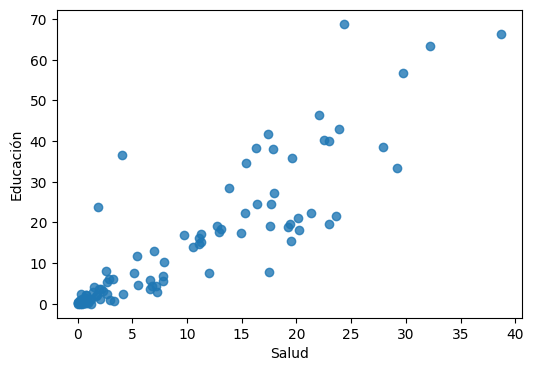

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datosSalud, y=datosEducacion, alpha= 0.8)
ax.set_xlabel('Salud')
ax.set_ylabel('Educación');

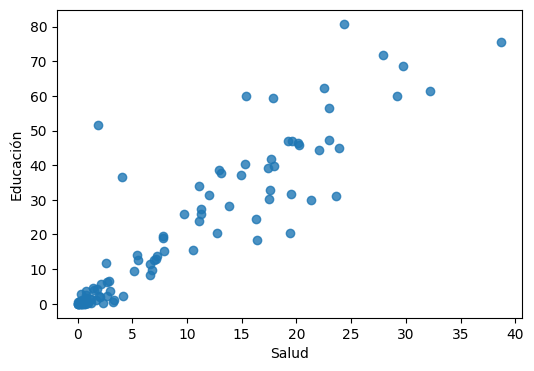

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datosSalud, y=datosEstandarVida, alpha= 0.8)
ax.set_xlabel('Salud')
ax.set_ylabel('Educación');

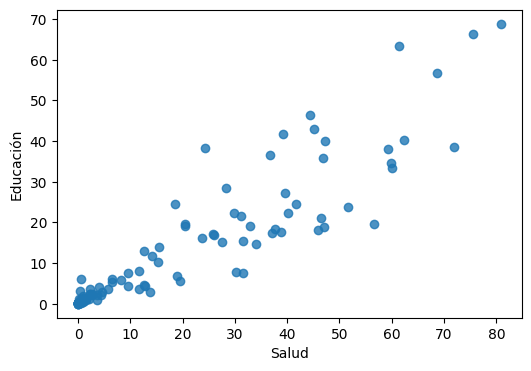

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datosEstandarVida, y=datosEducacion, alpha= 0.8)
ax.set_xlabel('Salud')
ax.set_ylabel('Educación');

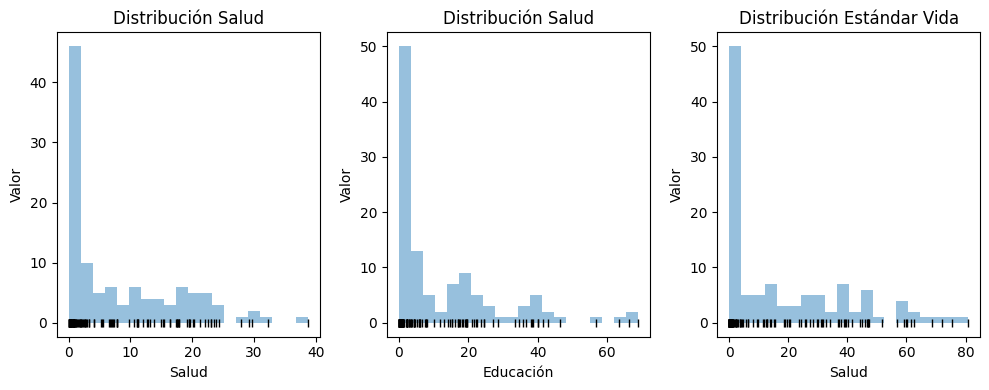

In [41]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

axs[0].hist(x=datosSalud, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datosSalud, np.full_like(datosSalud, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Salud')
axs[0].set_xlabel('Salud')
axs[0].set_ylabel('Valor')

axs[1].hist(x=datosEducacion, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datosEducacion, np.full_like(datosEducacion, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución Salud')
axs[1].set_xlabel('Educación')
axs[1].set_ylabel('Valor')

axs[2].hist(x=datosEstandarVida, bins=20, color="#3182bd", alpha=0.5)
axs[2].plot(datosEstandarVida, np.full_like(datosEstandarVida, -0.01), '|k', markeredgewidth=1)
axs[2].set_title('Distribución Estándar Vida')
axs[2].set_xlabel('Salud')
axs[2].set_ylabel('Valor')




plt.tight_layout();

In [42]:
shapiro_test = stats.shapiro(datosSalud)
print(f"Variable Salud: {shapiro_test}")
shapiro_test = stats.shapiro(datosEducacion)
print(f"Variable Educación: {shapiro_test}")
shapiro_test = stats.shapiro(datosEstandarVida)
print(f"Variable Estándar de vida: {shapiro_test}")

Variable Salud: ShapiroResult(statistic=0.8326435089111328, pvalue=7.083889030923274e-10)
Variable Educación: ShapiroResult(statistic=0.774468719959259, pvalue=9.13967859728082e-12)
Variable Estándar de vida: ShapiroResult(statistic=0.8196799159049988, pvalue=2.485596450885197e-10)


In [43]:
k2, p_value = stats.normaltest(datosSalud)
print(f"Variable Salud: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(datosEducacion)
print(f"Variable Educación: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(datosEstandarVida)
print(f"Variable Estandar de vida: Estadítico = {k2}, p-value = {p_value}")

Variable Salud: Estadítico = 16.389139230578234, p-value = 0.00027614910149992804
Variable Educación: Estadítico = 38.12780858568331, p-value = 5.255954078120986e-09
Variable Estandar de vida: Estadítico = 16.436576872583704, p-value = 0.000269676238191585


In [44]:

kolmogorov_test_salud = stats.kstest(datosSalud, 'norm')
print(f"Variable Salud: {kolmogorov_test_salud}")

kolmogorov_test_educacion = stats.kstest(datosEducacion, 'norm')
print(f"Variable Educación: {kolmogorov_test_educacion}")

kolmogorov_test_estandar_vida = stats.kstest(datosEstandarVida, 'norm')
print(f"Variable Estándar de vida: {kolmogorov_test_estandar_vida}")

Variable Salud: KstestResult(statistic=0.576958520848349, pvalue=1.4812913808258442e-35, statistic_location=1.698962754586715, statistic_sign=-1)
Variable Educación: KstestResult(statistic=0.6168049652388446, pvalue=3.463612158898358e-41, statistic_location=2.202197922080555, statistic_sign=-1)
Variable Estándar de vida: KstestResult(statistic=0.6094776866108779, pvalue=4.158909120575121e-40, statistic_location=2.03049855365213, statistic_sign=-1)


In [45]:
display(pg.corr(datosSalud, datosEducacion, method='spearman'))
#display(pg.corr(datosSalud, datosEducacion, method='kendall'))

,n,r,CI95%,p-val,power
spearman,111,0.921446,"[0.89, 0.95]",1.450245e-46,1.0


In [46]:
display(pg.corr(datosSalud, datosEstandarVida, method='spearman'))
#display(pg.corr(datosSalud, datosEstandarVida, method='kendall'))

,n,r,CI95%,p-val,power
spearman,111,0.927106,"[0.9, 0.95]",2.874227e-48,1.0


In [47]:
display(pg.corr(datosEstandarVida, datosEducacion, method='spearman'))
#display(pg.corr(datosEstandarVida, datosEducacion, method='kendall'))

,n,r,CI95%,p-val,power
spearman,111,0.957371,"[0.94, 0.97]",1.305894e-60,1.0
